In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import joblib
import gc

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors, kneighbors_graph, KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest



In [20]:
file_name = 'data/df_featured.csv'
df = pd.read_csv(file_name)

In [21]:
df

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,Nz,PCV,curvature,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR
0,2,0,1,-44.740089,95.622840,0.461706,-536.881073,1147.474078,5.540477,-536.8750,...,0.389931,0.843750,0.149344,0.724145,0.792133,0.321073,67.049772,0.987993,67.049772,0.987993
1,1,0,1,-44.734279,95.852516,0.465142,-536.811350,1150.230197,5.581708,-536.8125,...,0.588295,0.875000,0.161436,0.920210,0.984326,0.349443,53.963871,359.827117,53.963871,359.827117
2,7,0,1,-44.687991,68.614892,0.515877,-536.255891,823.378702,6.190529,-536.2500,...,0.806496,0.859375,0.155343,1.001297,1.172741,0.610511,36.245059,359.008689,36.245059,359.008689
3,14,0,1,-44.691207,68.532991,0.520316,-536.294489,822.395892,6.243798,-536.3125,...,0.708769,0.847656,0.146301,0.938384,1.105544,0.584519,44.865120,354.635177,44.865120,354.635177
4,5,0,1,-44.672647,68.584964,0.532589,-536.071764,823.019572,6.391073,-536.0625,...,0.783998,0.929688,0.109077,0.990114,1.157254,0.599092,38.371867,359.243706,38.371867,359.243706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445083,8,2,4,-44.651243,126.381397,0.485365,-535.814911,1516.576763,5.824383,-535.8125,...,0.187217,0.929688,0.075164,0.473043,0.723251,0.547103,79.209591,333.249824,79.209591,333.249824
445084,5,2,4,-44.658548,127.829311,0.456161,-535.902581,1533.951733,5.473936,-535.8750,...,0.586411,0.988281,0.052037,0.281351,0.327653,0.167923,54.097234,159.853070,54.097234,159.853070
445085,6,2,4,-44.715691,127.804043,0.368167,-536.588288,1533.648510,4.418000,-536.5625,...,0.366107,0.953125,0.077116,0.154865,0.193235,0.115570,68.524304,166.669883,68.524304,166.669883
445086,4,2,4,-44.721779,127.823110,0.305596,-536.661353,1533.877317,3.667155,-536.6875,...,0.125143,0.910156,0.043835,0.154684,0.206703,0.137110,82.810969,164.793458,82.810969,164.793458


In [22]:
# GOAL
'''
is_rail_a
is_rail_b
is_web
is_head_top
is_head_side
is_noise
'''

'\nis_rail_a\nis_rail_b\nis_web\nis_head_top\nis_head_side\nis_noise\n'

In [23]:
# Calculate the mean of the 'lateral' column
lateral_mean = df['lateral'].mean()

# Create binary flags
df['is_rail_a'] = (df['lateral'] < lateral_mean).astype(int)  # 1 if less than mean, else 0
df['is_rail_b'] = (df['lateral'] >= lateral_mean).astype(int) # 1 if greater than or equal to mean, else 0


In [24]:
df.describe()

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,curvature,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b
count,445088.000000,445088.000000,445088.00000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,...,4.450880e+05,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000,445088.000000
mean,6.324044,1.418045,3.44398,-12.422744,66.977098,0.302900,-149.072928,803.725180,3.634798,-149.072965,...,6.317478e-02,0.530083,0.632595,0.336709,68.732542,181.887122,68.732542,181.887122,0.573210,0.426790
std,5.293839,0.799852,0.82592,37.453990,28.642543,0.125000,449.447882,343.710520,1.500005,449.447931,...,3.764652e-02,0.277402,0.291693,0.118100,23.054316,116.906969,23.054316,116.906969,0.494612,0.494612
min,0.000000,0.000000,1.00000,-44.925005,0.364759,0.000000,-539.100056,4.377103,0.000000,-539.125000,...,-8.645501e-17,0.137150,0.169088,0.097507,0.044541,0.000012,0.044541,0.000012,0.000000,0.000000
25%,2.000000,1.000000,3.00000,-44.755493,41.903643,0.224828,-537.065914,502.843713,2.697932,-537.062500,...,3.726734e-02,0.331466,0.422334,0.251480,60.183440,172.623609,60.183440,172.623609,0.000000,0.000000
50%,5.000000,2.000000,4.00000,-44.685713,68.630082,0.297971,-536.228558,823.560989,3.575652,-536.250000,...,5.243843e-02,0.408629,0.510461,0.295447,77.717117,180.057912,77.717117,180.057912,1.000000,0.000000
75%,9.000000,2.000000,4.00000,30.974642,89.470206,0.376883,371.695703,1073.642469,4.522595,371.687500,...,7.995804e-02,0.650695,0.755575,0.395858,85.965675,189.035001,85.965675,189.035001,1.000000,1.000000
max,91.000000,2.000000,4.00000,31.502451,127.864617,0.640827,378.029415,1534.375405,7.689924,378.000000,...,3.103047e-01,3.276487,3.711925,1.744426,89.999976,359.999934,89.999976,359.999934,1.000000,1.000000


In [25]:
df.columns


Index(['Intensity', 'Original_cloud_index', 'Classification', 'lateral',
       'axial', 'vertical', 'lateral_inch', 'axial_inch', 'vertical_inch',
       'lateral_inch_round', 'axial_inch_round', 'vertical_inch_round',
       'min_in_window', 'relative_vertical_inch', 'lam1', 'lam2', 'lam3',
       'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z',
       'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy', 'planarity',
       'linearity', 'surface_variation', 'sphericity', 'pca1', 'pca2',
       'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature',
       'roughness_mean_abs', 'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR',
       'NORMDIP', 'NORMDIPDIR', 'is_rail_a', 'is_rail_b'],
      dtype='object')

In [26]:

MODEL_PATH = "rf_classification_ideal_rail.joblib"
META_PATH = "rf_classification_ideal_rail_metadata.json"

# 1) Load model and metadata
pipeline = joblib.load(MODEL_PATH)
with open(META_PATH, "r") as f:
    features = json.load(f)["features"]

# 2) Prepare data
df_new = df.copy()
for col in features:
    if col not in df_new:
        df_new[col] = np.nan
X_new = df_new[features].apply(pd.to_numeric, errors='coerce')

# 3) Predict
df_new["RF_Prediction"] = pipeline.predict(X_new)

# Optional: add probabilities if available
rf = pipeline.named_steps.get("rf")
if hasattr(rf, "predict_proba"):
    proba = pipeline.predict_proba(X_new)
    df_new["RF_ProbMax"] = proba.max(axis=1)
    classes = rf.classes_
    idx = df_new["RF_Prediction"].map({c: i for i, c in enumerate(classes)}).to_numpy()
    df_new["RF_Pred_Prob"] = proba[np.arange(len(df_new)), idx]

print("Predictions added: RF_Prediction (+ probabilities if available)")


Predictions added: RF_Prediction (+ probabilities if available)


In [27]:
df_new

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b,RF_Prediction,RF_ProbMax,RF_Pred_Prob
0,2,0,1,-44.740089,95.622840,0.461706,-536.881073,1147.474078,5.540477,-536.8750,...,0.321073,67.049772,0.987993,67.049772,0.987993,1,0,2,0.550000,0.550000
1,1,0,1,-44.734279,95.852516,0.465142,-536.811350,1150.230197,5.581708,-536.8125,...,0.349443,53.963871,359.827117,53.963871,359.827117,1,0,4,0.613333,0.613333
2,7,0,1,-44.687991,68.614892,0.515877,-536.255891,823.378702,6.190529,-536.2500,...,0.610511,36.245059,359.008689,36.245059,359.008689,1,0,4,0.616667,0.616667
3,14,0,1,-44.691207,68.532991,0.520316,-536.294489,822.395892,6.243798,-536.3125,...,0.584519,44.865120,354.635177,44.865120,354.635177,1,0,4,0.723333,0.723333
4,5,0,1,-44.672647,68.584964,0.532589,-536.071764,823.019572,6.391073,-536.0625,...,0.599092,38.371867,359.243706,38.371867,359.243706,1,0,4,0.686667,0.686667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445083,8,2,4,-44.651243,126.381397,0.485365,-535.814911,1516.576763,5.824383,-535.8125,...,0.547103,79.209591,333.249824,79.209591,333.249824,1,0,2,0.380000,0.380000
445084,5,2,4,-44.658548,127.829311,0.456161,-535.902581,1533.951733,5.473936,-535.8750,...,0.167923,54.097234,159.853070,54.097234,159.853070,1,0,4,0.543333,0.543333
445085,6,2,4,-44.715691,127.804043,0.368167,-536.588288,1533.648510,4.418000,-536.5625,...,0.115570,68.524304,166.669883,68.524304,166.669883,1,0,2,0.476667,0.476667
445086,4,2,4,-44.721779,127.823110,0.305596,-536.661353,1533.877317,3.667155,-536.6875,...,0.137110,82.810969,164.793458,82.810969,164.793458,1,0,3,0.576667,0.576667


In [28]:
# Calculate the mean of the 'lateral' column
lateral_mean = df_new['lateral'].mean()

# Create binary flags
df_new['is_rail_a'] = (df_new['lateral'] < lateral_mean).astype(int)  # 1 if less than mean, else 0
df_new['is_rail_b'] = (df_new['lateral'] >= lateral_mean).astype(int) # 1 if greater than or equal to mean, else 0

In [29]:
dfa_new = df_new[df_new['is_rail_a'] == 1].copy()
dfb_new = df_new[df_new['is_rail_b'] == 1].copy()

In [30]:
dfa_new_filtered = dfa_new[(dfa_new['RF_Prediction'] != 4)].copy()
dfb_new_filtered = dfb_new[(dfb_new['RF_Prediction'] != 4)].copy()

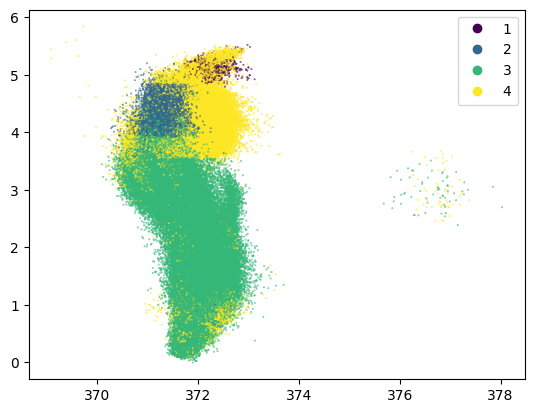

In [31]:
scatter = plt.scatter(dfb_new['lateral_inch'], dfb_new['vertical_inch'], c=dfb_new['RF_Prediction'], s=0.1)
plt.legend(*scatter.legend_elements())

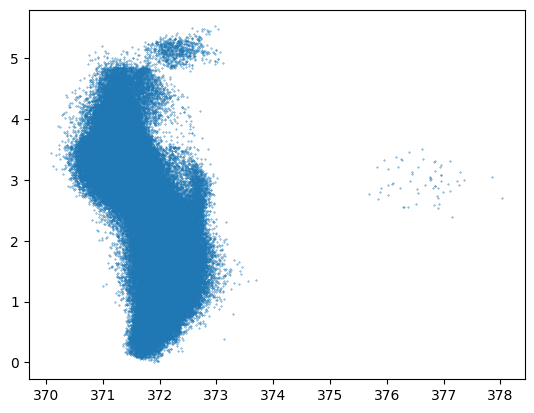

In [32]:
scatter = plt.scatter(dfb_new_filtered['lateral_inch'], dfb_new_filtered['vertical_inch'], s=0.1)

In [33]:
# Unsupervised Learning Models — Setup

# --- data source ---
df_in = dfb_new_filtered.copy()

feature_cols = ['lateral_inch', 'vertical_inch']  
random_state = 42
plot_sample_n = 50_000
silhouette_sample_n = 50_000

# --- numeric prep: impute + scale ---
X_raw = df_in[feature_cols].apply(pd.to_numeric, errors='coerce').to_numpy()
imputer = SimpleImputer(strategy='median')
X_num = imputer.fit_transform(X_raw)
scaler = StandardScaler()
X = scaler.fit_transform(X_num)

# --- helpers ---
def sample_idx(n, cap, seed=random_state):
    if n <= cap:
        return np.arange(n)
    rng = np.random.default_rng(seed)
    return rng.choice(n, size=cap, replace=False)

def safe_silhouette(X_arr, labels, sample_cap=silhouette_sample_n, ignore_label=-1):
    lbl = np.asarray(labels)
    if ignore_label is not None:
        mask = lbl != ignore_label
    else:
        mask = np.ones(len(lbl), dtype=bool)
    if mask.sum() < 3:
        return np.nan
    uniq = np.unique(lbl[mask])
    if len(uniq) < 2:
        return np.nan
    idx = sample_idx(mask.sum(), sample_cap)
    return float(silhouette_score(X_arr[mask][idx], lbl[mask][idx]))

# --- baseline --- 
df_base = df_in.copy()
X_base = X
print(f"Setup complete: X shape = {X.shape}, using features: {feature_cols}")

Setup complete: X shape = (146247, 2), using features: ['lateral_inch', 'vertical_inch']


In [34]:
def quick_scatter(dfp, col, title):
    idx = sample_idx(len(dfp), plot_sample_n)
    d = dfp.iloc[idx]
    labels = d[col].to_numpy()

    cmap = plt.get_cmap('tab10')
    unique = np.unique(labels[~pd.isna(labels)])  # non-NaN unique labels

    # Color map: clusters use tab10, -1 is "noise" gray, anything else defaults darker gray
    colors = {l: cmap(int(l) % 10) for l in unique if l != -1}
    colors[-1] = (0.6, 0.6, 0.6, 0.6)  # noise
    default_unlabeled = (0.2, 0.2, 0.2, 0.4)  # unlabeled (NaN) + any unexpected labels
    c = [colors.get(l, default_unlabeled) for l in labels]

    plt.figure(figsize=(6, 6))
    plt.scatter(d['lateral_inch'], d['vertical_inch'], s=1, c=c, alpha=0.2)
    plt.title(title)
    plt.xlabel('lateral_inch')
    plt.ylabel('vertical_inch')

    # --- Legend ---
    from matplotlib.lines import Line2D
    # Sort numeric labels if possible (excluding -1 which we add as "noise")
    try:
        cluster_labs = sorted([l for l in unique if l != -1])
    except Exception:
        cluster_labs = [l for l in unique if l != -1]

    handles = [
        Line2D([0], [0], marker='o', linestyle='None', markersize=6,
               markerfacecolor=colors[l], markeredgecolor='none',
               label=f'cluster {int(l)}')
        for l in cluster_labs
    ]

    # Add noise (-1) if present
    if np.any(labels == -1):
        handles.append(
            Line2D([0], [0], marker='o', linestyle='None', markersize=6,
                   markerfacecolor=colors[-1], markeredgecolor='none',
                   label='noise')
        )

    # Add unlabeled (NaN) if present
    if pd.isna(labels).any():
        handles.append(
            Line2D([0], [0], marker='o', linestyle='None', markersize=6,
                   markerfacecolor=default_unlabeled, markeredgecolor='none',
                   label='unlabeled')
        )

    if handles:
        plt.legend(handles=handles, loc='best', frameon=False)

    plt.tight_layout()
    plt.show()


In [35]:
# Cell 2 — DBSCAN clustering

min_samples_dbscan = 20
quantile_for_eps = 0.98

def suggest_eps(X_arr, k=min_samples_dbscan, q=quantile_for_eps):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_arr)
    dists, _ = nn.kneighbors(X_arr)
    kth = np.sort(dists[:, -1])
    return float(np.quantile(kth, q))

eps = suggest_eps(X, min_samples_dbscan, quantile_for_eps)
dbscan = DBSCAN(eps=eps, min_samples=min_samples_dbscan, n_jobs=-1)
labels_db = dbscan.fit_predict(X)

df_in['CL_DBSCAN'] = labels_db
sil_db = safe_silhouette(X, labels_db, ignore_label=-1)
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = int((labels_db == -1).sum())
print(f"[DBSCAN] eps≈{eps:.3f}, min_samples={min_samples_dbscan}, clusters={n_clusters}, noise={n_noise}, silhouette={sil_db:.3f}")

[DBSCAN] eps≈0.068, min_samples=20, clusters=4, noise=1724, silhouette=0.086


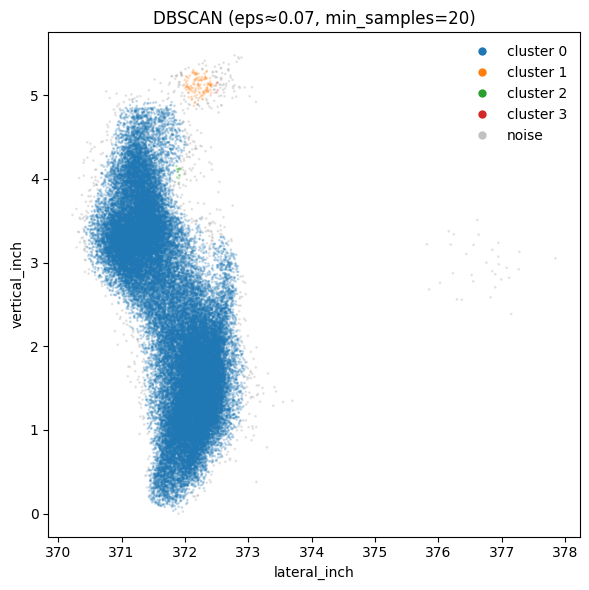

In [36]:
quick_scatter(df_in, 'CL_DBSCAN', f"DBSCAN (eps≈{eps:.2f}, min_samples={min_samples_dbscan})")

In [37]:
df_in.describe()

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,...,DIP,DIPDIR,NORMDIP,NORMDIPDIR,is_rail_a,is_rail_b,RF_Prediction,RF_ProbMax,RF_Pred_Prob,CL_DBSCAN
count,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,146247.000000,...,146247.000000,146247.000000,146247.000000,146247.000000,146247.0,146247.0,146247.000000,146247.000000,146247.000000,146247.000000
mean,5.252915,1.541618,3.407899,30.981955,73.032745,0.196613,371.783456,876.392942,2.359359,371.783453,...,73.495451,188.140174,73.495451,188.140174,0.0,1.0,2.922214,0.770693,0.770693,-0.008260
std,4.810051,0.498267,0.717180,0.043410,28.948308,0.092538,0.520923,347.379699,1.110454,0.521230,...,11.216532,133.057877,11.216532,133.057877,0.0,0.0,0.285507,0.164115,0.164115,0.129062
min,0.000000,1.000000,1.000000,30.840852,14.539039,0.000000,370.090226,174.468471,0.000000,370.062500,...,0.790705,0.000220,0.790705,0.000220,0.0,1.0,1.000000,0.326667,0.326667,-1.000000
25%,2.000000,1.000000,3.000000,30.947771,47.794965,0.118644,371.373256,573.539574,1.423730,371.375000,...,65.536994,11.531949,65.536994,11.531949,0.0,1.0,3.000000,0.663333,0.663333,0.000000
50%,4.000000,2.000000,4.000000,30.985652,74.351271,0.187827,371.827828,892.215255,2.253924,371.812500,...,74.706817,180.197698,74.706817,180.197698,0.0,1.0,3.000000,0.846667,0.846667,0.000000
75%,7.000000,2.000000,4.000000,31.015614,95.296116,0.273565,372.187371,1143.553388,3.282778,372.187500,...,82.710597,353.963957,82.710597,353.963957,0.0,1.0,3.000000,0.896667,0.896667,0.000000
max,72.000000,2.000000,4.000000,31.502451,125.559816,0.459918,378.029415,1506.717798,5.519015,378.000000,...,89.999945,359.999931,89.999945,359.999931,0.0,1.0,3.000000,0.993333,0.993333,3.000000


In [38]:
# --- use DBSCAN to denoise for subsequent methods ---
use_denoised_for_next = True  # set False to keep all points downstream
if use_denoised_for_next:
    keep = labels_db != -1
    df_base = df_in.loc[keep].copy()
    X_base = X[keep]
    kept_ratio = keep.sum() / len(df_in)
    print(f"Using denoised base for next methods: kept {keep.sum()} / {len(df_in)} ({kept_ratio:.1%}) points")
else:
    df_base = df_in.copy()
    X_base = X

Using denoised base for next methods: kept 144523 / 146247 (98.8%) points


[IsolationForest] kept 143322 / 146247 (98.0%)


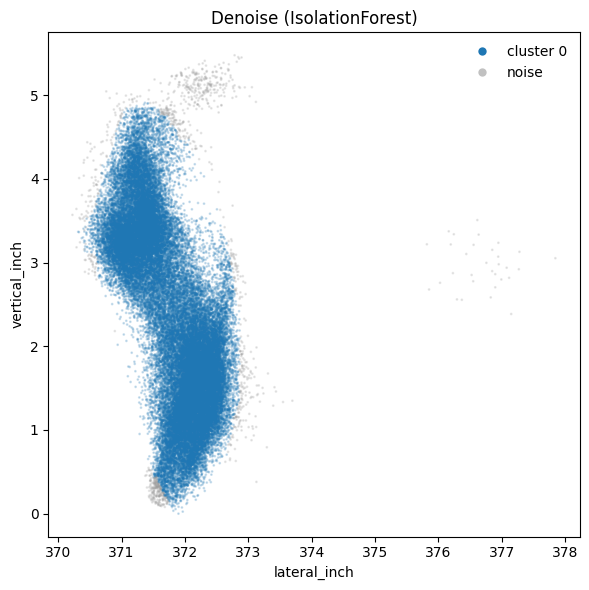

In [39]:

# Simple Isolation Forest Denoising

# Config
contamination = 0.02  # expected outlier fraction
random_state = 42

# Scale features (recommended)
Xs = StandardScaler().fit_transform(X)

# Fit Isolation Forest
iso = IsolationForest(contamination=contamination, random_state=random_state, n_jobs=-1)
keep = iso.fit_predict(Xs) == 1  # True = inlier

# Subset for next steps
df_base = df_in.loc[keep].copy()
X_base = X[keep]

print(f"[IsolationForest] kept {keep.sum()} / {len(keep)} ({keep.mean():.1%})")

# visualize kept vs dropped
tmp = df_in.copy()
tmp['_mask'] = np.where(keep, 0, -1)
quick_scatter(tmp, '_mask', f"Denoise (IsolationForest)")


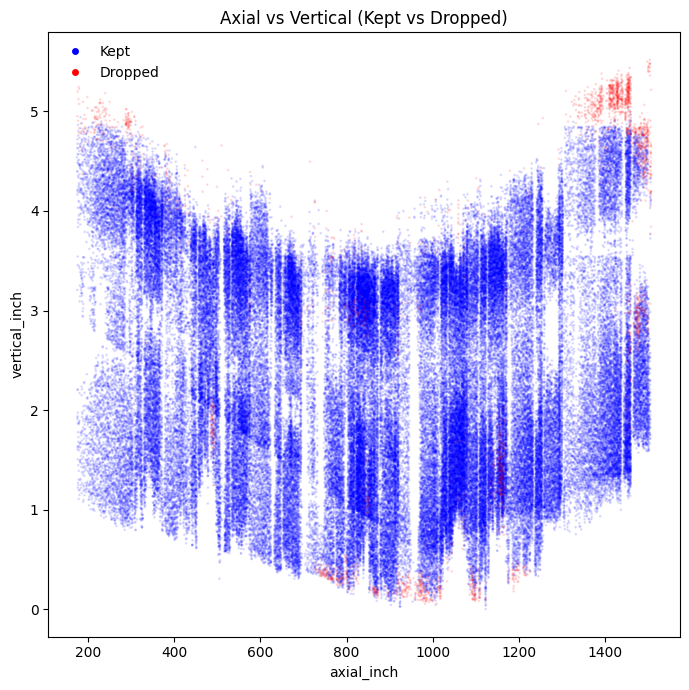

In [40]:
import matplotlib.pyplot as plt

# Assume `keep` is a boolean mask from your denoising step
colors = np.where(keep, 'blue', 'red')  # blue = kept, red = dropped

plt.figure(figsize=(7, 7))
plt.scatter(df_in['axial_inch'], df_in['vertical_inch'], s=1, c=colors, alpha=0.1)
plt.xlabel('axial_inch')
plt.ylabel('vertical_inch')
plt.title('Axial vs Vertical (Kept vs Dropped)')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Kept', markerfacecolor='blue', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Dropped', markerfacecolor='red', markersize=6)
], loc='best', frameon=False)
plt.tight_layout()
plt.show()


In [41]:
# Cell 3 — Agglomerative (Ward) with memory-safe options

k_for_methods = 3

# Always downcast to float32 to halve memory
Xb = X_base.astype(np.float32, copy=False)

# Uses a sparse k-NN graph to limit merges (massive memory/time reduction)
try:
    n_neighbors_graph = 20  # 10–30 typical; larger -> smoother clusters but more memory
    connectivity = kneighbors_graph(
        Xb, n_neighbors=n_neighbors_graph, include_self=False,
        mode='distance', n_jobs=-1
    )
    connectivity = connectivity.astype(np.float32)

    ward = AgglomerativeClustering(
        n_clusters=k_for_methods,
        linkage='ward',
        connectivity=connectivity,
        compute_full_tree='auto' 
    )
    labels_ward = ward.fit_predict(Xb)

    df_base['CL_WARD'] = labels_ward
    df_in['CL_WARD'] = np.nan
    df_in.loc[df_base.index, 'CL_WARD'] = labels_ward

    sil_ward = safe_silhouette(Xb, labels_ward)
    print(f"[Ward+connectivity] k={k_for_methods}, nn={n_neighbors_graph}, silhouette={sil_ward:.3f}")

except MemoryError:
    print("MemoryError on connectivity-constrained Ward. Falling back to two-stage approach...")
    labels_ward = None
except Exception as e:
    print("Ward with connectivity failed:", e)
    labels_ward = None



[Ward+connectivity] k=3, nn=20, silhouette=0.374


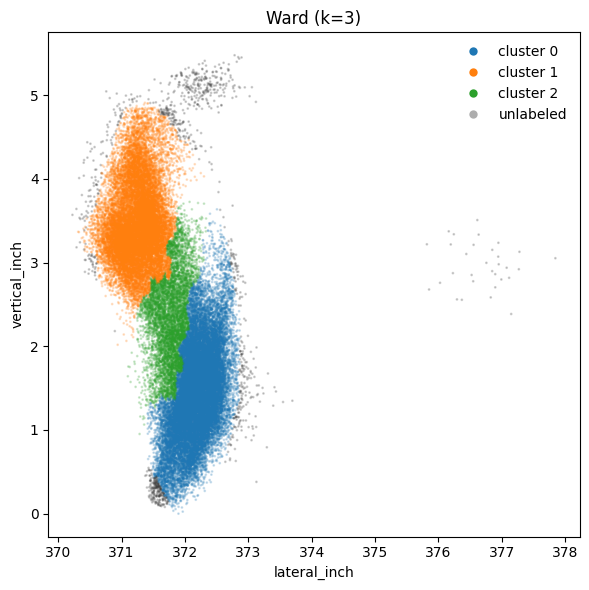

In [42]:
quick_scatter(df_in, 'CL_WARD', f"Ward (k={k_for_methods})")

# Cell 4 — Spectral Clustering

n_neighbors_graph = 20
n2 = X_base.shape[0]
nn = min(n_neighbors_graph, max(5, n2 - 1))

spectral = SpectralClustering(
    n_clusters=k_for_methods,
    affinity='nearest_neighbors',
    n_neighbors=nn,
    assign_labels='kmeans',
    random_state=42,
    n_init=10
)
labels_spec = spectral.fit_predict(X_base)

df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

sil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)
print(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")


In [43]:
# Cell 4 — Spectral Clustering

n_neighbors_graph = 20
n2 = X_base.shape[0]
nn = min(n_neighbors_graph, max(5, n2 - 1))

spectral = SpectralClustering(
    n_clusters=k_for_methods,
    affinity='nearest_neighbors',
    n_neighbors=nn,
    assign_labels='kmeans',
    random_state=42,
    n_init=10
)
labels_spec = spectral.fit_predict(X_base)

df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

sil_spec = safe_silhouette(X_base, labels_spec, ignore_label=None)
print(f"[Spectral] clusters={len(np.unique(labels_spec))}, silhouette={sil_spec:.3f} (nn={nn})")


[Spectral] clusters=3, silhouette=0.450 (nn=20)


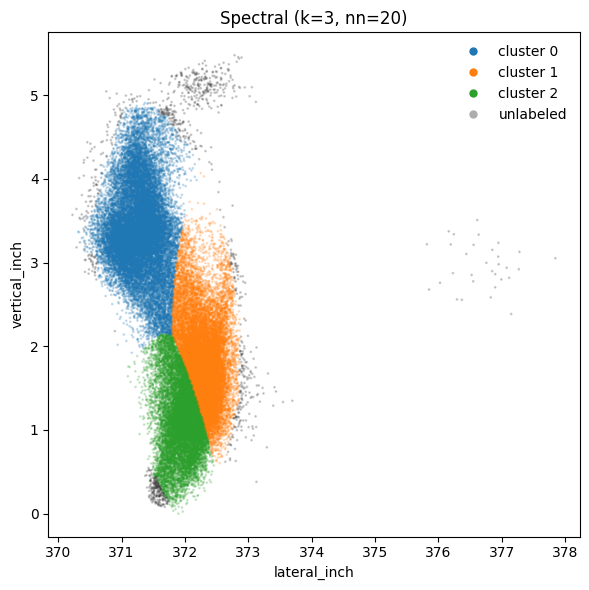

In [44]:
quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (k={k_for_methods}, nn={nn})")

In [45]:
# Spectral Clustering (two-stage: micro-centers -> spectral -> propagate)

# Config
k_for_methods = 3
micro_k = 1000
n_neighbors_graph = 20
affinity_mode = 'nearest_neighbors'
propagate_via_knn = False
knn_neighbors = 7
random_state = 42

Xb = X_base.astype(np.float32, copy=False)

# Stage 1: Micro-clusters
mbk = MiniBatchKMeans(n_clusters=min(micro_k, len(Xb)), batch_size=4096,
                      random_state=random_state, n_init='auto')
micro_labels = mbk.fit_predict(Xb)
centers = mbk.cluster_centers_.astype(np.float32)
m = centers.shape[0]
print(f"[Spectral-2stage] micro centers: {m}")

# Stage 2: Spectral on centers
if affinity_mode == 'nearest_neighbors':
    nn = min(n_neighbors_graph, max(5, m - 1))
    spectral = SpectralClustering(n_clusters=k_for_methods, affinity='nearest_neighbors',
                                   n_neighbors=nn, assign_labels='kmeans',
                                   random_state=random_state, n_init=10)
elif affinity_mode == 'rbf':
    from sklearn.metrics.pairwise import pairwise_distances
    sample = np.random.default_rng(42).choice(m, min(m, 3000), replace=False)
    dists = pairwise_distances(centers[sample], centers[sample])
    med = np.median(dists[np.triu_indices_from(dists, 1)])
    gamma = 1.0 / (2.0 * (med ** 2) + 1e-12)
    spectral = SpectralClustering(n_clusters=k_for_methods, affinity='rbf', gamma=gamma,
                                   assign_labels='kmeans', random_state=random_state, n_init=10)

center_labels = spectral.fit_predict(centers)

# Stage 3: Propagate labels
if propagate_via_knn:
    knn = KNeighborsClassifier(n_neighbors=knn_neighbors, weights='distance', n_jobs=-1)
    knn.fit(centers, center_labels)
    labels_spec = knn.predict(Xb)
else:
    labels_spec = pd.Series(center_labels).iloc[micro_labels].to_numpy()

# Store results
df_base['CL_SPECTRAL'] = labels_spec
df_in['CL_SPECTRAL'] = np.nan
df_in.loc[df_base.index, 'CL_SPECTRAL'] = labels_spec

# Score & quick scatter
sil_spec = safe_silhouette(Xb, labels_spec)
print(f"[Spectral-2stage] silhouette={sil_spec:.3f}")


del centers, micro_labels, center_labels
gc.collect()


[Spectral-2stage] micro centers: 1000
[Spectral-2stage] silhouette=0.448


7751

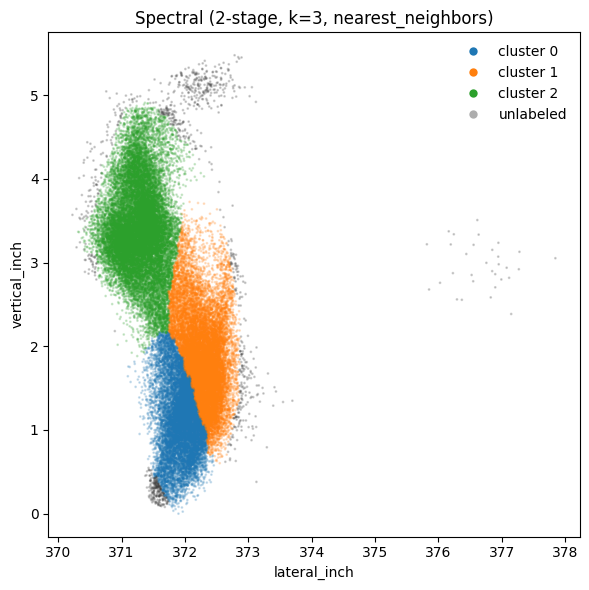

In [46]:
quick_scatter(df_in, 'CL_SPECTRAL', f"Spectral (2-stage, k={k_for_methods}, {affinity_mode})")

In [47]:

# Cell 5 — Gaussian Mixture (GMM)
gmm = GaussianMixture(
    n_components=k_for_methods,
    covariance_type='full',
    random_state=42,
    n_init=5
)
labels_gmm = gmm.fit_predict(X_base)

df_base['CL_GMM3'] = labels_gmm
df_in['CL_GMM3'] = np.nan
df_in.loc[df_base.index, 'CL_GMM3'] = labels_gmm

sil_gmm = safe_silhouette(X_base, labels_gmm, ignore_label=None)
print(f"[GMM-3] clusters={len(np.unique(labels_gmm))}, silhouette={sil_gmm:.3f}")

print("Cluster counts (GMM):")
print(df_in['CL_GMM3'].value_counts(dropna=False).sort_index())


[GMM-3] clusters=3, silhouette=0.399
Cluster counts (GMM):
CL_GMM3
0.0    72159
1.0    20424
2.0    50739
NaN     2925
Name: count, dtype: int64


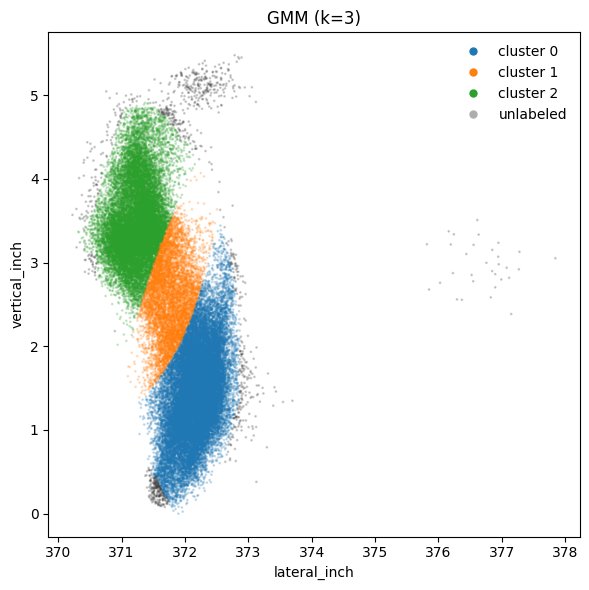

In [48]:
quick_scatter(df_in, 'CL_GMM3', f"GMM (k={k_for_methods})")

In [49]:
# Cell 6 — KMeans
kmeans = KMeans(n_clusters=k_for_methods, random_state=42, n_init='auto')
labels_km = kmeans.fit_predict(X_base)

df_base['CL_KMEANS3'] = labels_km
df_in['CL_KMEANS3'] = np.nan
df_in.loc[df_base.index, 'CL_KMEANS3'] = labels_km

sil_km = safe_silhouette(X_base, labels_km, ignore_label=None)
print(f"[KMeans-3] clusters={len(np.unique(labels_km))}, silhouette={sil_km:.3f}")


[KMeans-3] clusters=3, silhouette=0.416


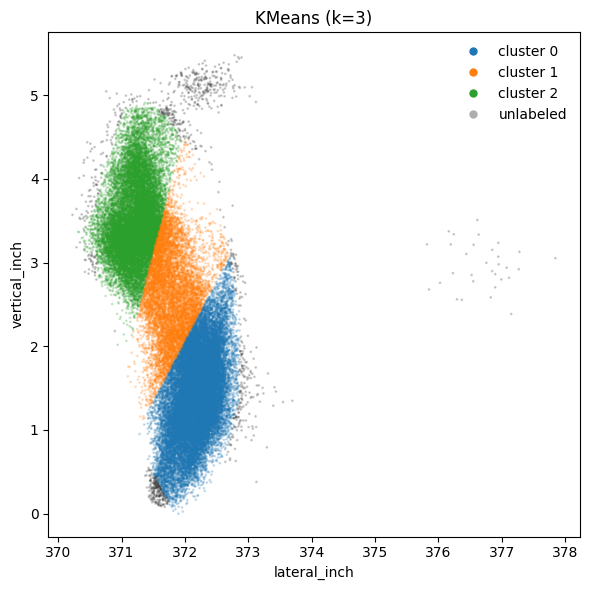

In [50]:
quick_scatter(df_in, 'CL_KMEANS3', "KMeans (k=3)")

In [51]:
# Cell 7 — Summary counts per label for each method
def cluster_counts(s):
    return pd.Series(s).value_counts(dropna=False).sort_index()

print("DBSCAN:\n",  cluster_counts(df_in['CL_DBSCAN']))
print("\nWard:\n",    cluster_counts(df_in['CL_WARD']))
print("\nSpectral:\n", cluster_counts(df_in['CL_SPECTRAL']))
print("\nGMM-3:\n",  cluster_counts(df_in['CL_GMM3']))
print("\nKMeans-3:\n", cluster_counts(df_in['CL_KMEANS3']))

DBSCAN:
 CL_DBSCAN
-1      1724
 0    144090
 1       370
 2        43
 3        20
Name: count, dtype: int64

Ward:
 CL_WARD
0.0    69992
1.0    54401
2.0    18929
NaN     2925
Name: count, dtype: int64

Spectral:
 CL_SPECTRAL
0.0    35358
1.0    47651
2.0    60313
NaN     2925
Name: count, dtype: int64

GMM-3:
 CL_GMM3
0.0    72159
1.0    20424
2.0    50739
NaN     2925
Name: count, dtype: int64

KMeans-3:
 CL_KMEANS3
0.0    69245
1.0    26196
2.0    47881
NaN     2925
Name: count, dtype: int64
